In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sigtools import *

sample_frequency = 1000
time = np.linspace(0, 1, sample_frequency, endpoint=True)

## Signal

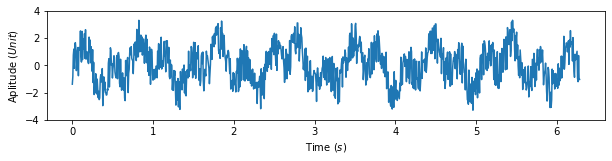

In [2]:
sig_1 = 1 * np.sin(2*np.pi * 6 * time) 
sig_2 = 2 * np.sin(2*np.pi * 13 * time) 

signal = sig_1 * sig_2

noise_level = 3
noise = noise_level * np.random.ranf(len(time)) - 1.5

noisy_signal = signal + noise
plot_signal(noisy_signal,4, sample_frequency)

## Sinc-Function
$$
\mathrm{sinc}(x)=\frac{\sin(\pi x)}{\pi x}
$$

In [3]:
def sinc(x):
    return np.sin(np.pi * x) / (np.pi * x)

Sampeling and scaling as to create a digital fiter

$$
h[n]=2f_c\mathrm{sinc}(2f_cn)
$$

In [4]:
cutoff_frequency = 20 # Hz
f_c = cutoff_frequency / sample_frequency

# Impulse Response
def sinc_filter(n):
    return 2*f_c*sinc(2*f_c*n)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


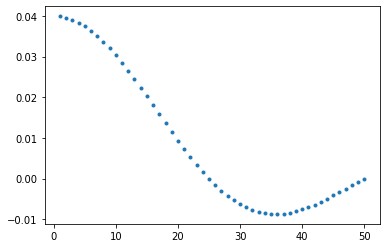

In [5]:
x = np.linspace(0,50,51)

plt.plot(x, sinc_filter(x), '.')

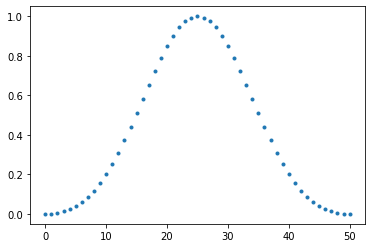

In [6]:
hann = np.blackman(len(x))
plt.plot(x,hann, '.')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


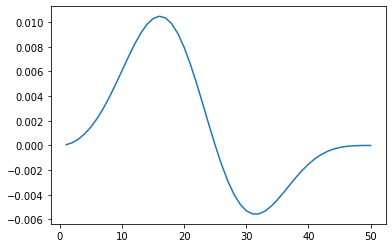

In [7]:
plt.plot(x, hann*sinc_filter(x), '-')

## Transition Bandwidth
Incorporating the transition bandwidth (roll off) of the filter. Using the following approximation of the relation between the transition bandwidth b and the filter length N.
$$
t_{band} = \frac{4}{N}
$$

## Example

In [8]:
cutoff_frequency = 30 # Hz
f_c = cutoff_frequency / sample_frequency

t_band = 20 # Hz
t_band = t_band / sample_frequency  # Transition band

N = int(np.ceil((4 / t_band))) # Filter length
if not N % 2: N += 1  # Make sure that N is odd.
print("Filter Length =",N)
n = np.arange(N)
 
# Compute sinc filter.
h = np.sinc(2 * f_c * (n - (N - 1) / 2))

Filter Length = 201


In [9]:
# Balckman window
w = np.blackman(N)

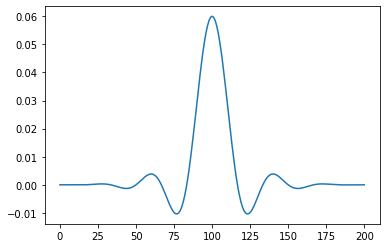

In [10]:
# Multiply filter by window.
h = h * w
 
# Normalize to get unity gain.
h = h / np.sum(h)
plt.plot(h)

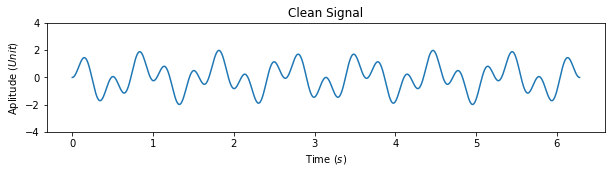

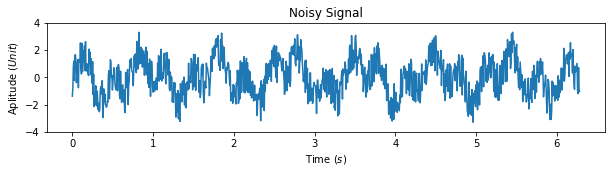

In [11]:
plot_signal(signal, 4, sample_frequency, title="Clean Signal")
plot_signal(noisy_signal, 4, sample_frequency, title="Noisy Signal")

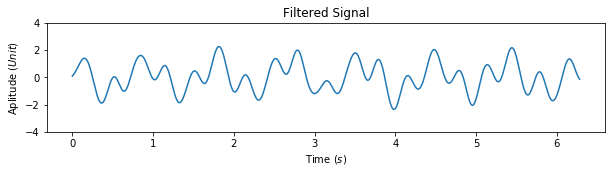

In [12]:
lowpass_sig = np.convolve(noisy_signal, h)
plot_signal(lowpass_sig[N//2-1:-N//2], 4, sample_frequency, title="Filtered Signal")

## Frequency Response

In [13]:
length = 2048 # Length of the frequency response

# Pad fitler with zeros
h_padded = np.zeros(length)
h_padded[0:N] = h

# Copute the frequency repsonse
response = np.abs(np.fft.fft(h_padded))
response = response[0: length // 2 + 1]

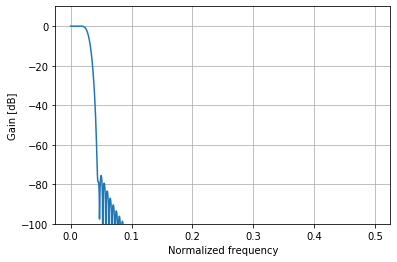

In [14]:
gain = np.linspace(0, 0.5, len(response))
norm_freq = 20*np.log10(response)

plt.figure()
plt.plot(gain, norm_freq)
plt.xlabel("Normalized frequency")
plt.ylabel("Gain [dB]")
plt.ylim(-100,10)
plt.grid()

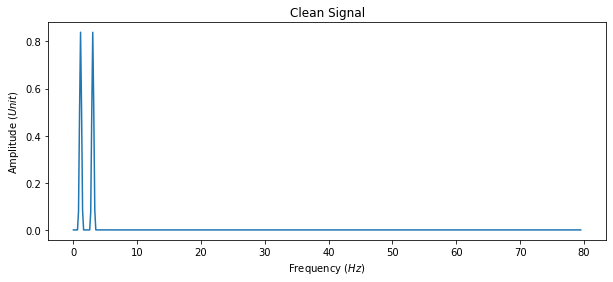

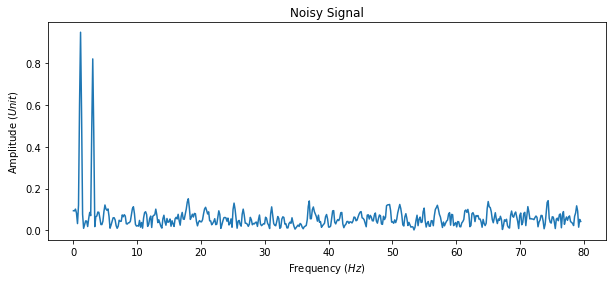

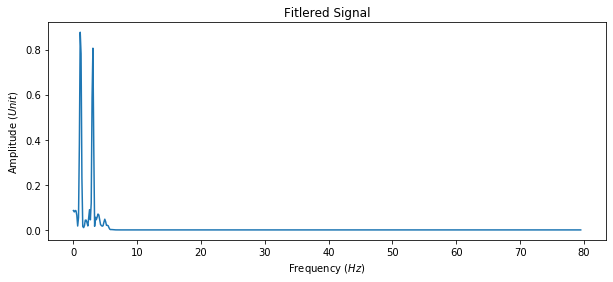

In [15]:
plot_fourier(signal, sample_frequency, title="Clean Signal")
plot_fourier(noisy_signal, sample_frequency, title="Noisy Signal")
plot_fourier(lowpass_sig, sample_frequency, title="Fitlered Signal")
